### Imports and Settings

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools import eval_measures
from sklearn.model_selection import train_test_split

In [2]:
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (30,10)

In [3]:
# https://realpython.com/python-pandas-tricks/
def start():
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

if __name__ == '__main__':
    start()
    del start  # Clean up namespace in the interpreter


### Question 1 - Reading in Data

In [4]:
chunksize = 10 ** 6
df = pd.concat([chunk for chunk in pd.read_csv('./properties_2017.csv', chunksize=chunksize)])
# Some dtype issues, but I'll probably ignore this for now

/Users/richardsharrott/dev/notebooks/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/richardsharrott/dev/notebooks/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (22,49) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/richardsharrott/dev/notebooks/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
description_df = df.describe()

In [6]:
description_df

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.9852e+06,815362.0000,6061.0000,1627.0000,2.9823e+06,2.9823e+06,12731.0000,1.9414e+06,2.8681e+06,17379.0,203758.0000,2.9401e+06,2.7208e+06,7671.0000,190185.0000,203758.0000,21482.0000,2.9823e+06,313124.0000,2.8681e+06,891008.0000,891008.0000,1.8692e+06,2.9823e+06,2.9823e+06,2.7125e+06,539632.0,27958.0000,17006.0,33056.0,505895.0,2.9823e+06,2.9823e+06,2.9231e+06,2.9823e+06,1.1567e+06,2.9725e+06,2.9822e+06,1623.0,316357.0000,6746.0000,1.9810e+06,81588.0000,2646.0000,2.9374e+06,685676.0000,2.9388e+06,2.9510e+06,2.9823e+06,2.9253e+06,2.9625e+06,56517.0000,2.9102e+06
mean,1.3326e+07,1.9457,7.2026,647.2207,2.2162e+00,3.0934e+00,3.7347,6.2808e+00,2.3038e+00,66.0,1379.7805,1.8315e+03,1.7640e+03,1178.9167,2754.8692,1392.0291,2427.5552,6.0481e+03,1.1690,2.2481e+00,1.8266,383.1562,4.0838e+00,3.4001e+07,-1.1820e+08,2.2604e+04,1.0,519.7154,1.0,1.0,1.0,2.6005e+02,6.0484e+07,3.4988e+04,2.5691e+03,1.9354e+05,9.6553e+04,1.4744e+00,7.0,1.0106,5.9996,1.1803e+00,321.5416,278.3655,1.9644e+03,1.4010,1.7814e+05,4.4353e+05,2.0160e+03,2.6846e+05,5.4089e+03,13.8917,6.0484e+13
std,7.9100e+06,3.1605,2.4363,538.7871,1.0782e+00,1.2716e+00,0.5004,1.7299e+00,1.0032e+00,0.0,634.4228,1.9542e+03,1.0314e+03,357.0936,5999.3801,682.3239,7786.1852,2.0241e+01,0.4619,9.9300e-01,0.6089,246.2194,3.2868e+00,2.4352e+05,3.4559e+05,2.4998e+05,0.0,191.3259,0.0,0.0,0.0,1.5931e+01,2.0089e+05,5.0710e+04,7.8868e+02,1.6573e+05,3.6808e+03,2.8399e+00,0.0,0.1206,0.3841,2.4869e+00,236.8848,369.7844,2.3644e+01,0.5391,4.6005e+05,8.1634e+05,6.0399e-02,4.8651e+05,9.6756e+03,2.5622,3.2491e+11
min,1.0712e+07,1.0000,2.0000,20.0000,0.0000e+00,0.0000e+00,1.0000,1.0000e+00,1.0000e+00,66.0,1.0000,1.0000e+00,1.0000e+00,120.0000,112.0000,3.0000,117.0000,6.0370e+03,1.0000,1.0000e+00,0.0000,0.0000,1.0000e+00,3.3324e+07,-1.1948e+08,1.0000e+02,1.0,19.0000,1.0,1.0,1.0,3.1000e+01,6.0371e+07,3.4910e+03,1.2860e+03,6.9520e+03,9.5982e+04,0.0000e+00,7.0,1.0000,4.0000,1.0000e+00,10.0000,10.0000,1.8010e+03,1.0000,1.0000e+00,1.0000e+00,2.0000e+03,1.0000e+00,2.4000e-01,0.0000,-1.0000e+00
25%,1.1644e+07,1.0000,7.0000,272.0000,2.0000e+00,2.0000e+00,3.0000,5.0000e+00,2.0000e+00,66.0,1010.0000,1.2150e+03,1.1980e+03,960.0000,1696.0000,1012.0000,1072.0000,6.0370e+03,1.0000,2.0000e+00,2.0000,312.0000,2.0000e+00,3.3827e+07,-1.1839e+08,5.6830e+03,1.0,430.0000,1.0,1.0,1.0,2.6100e+02,6.0374e+07,1.2447e+04,1.2860e+03,4.6736e+04,9.6180e+04,0.0000e+00,7.0,1.0000,6.0000,1.0000e+00,190.0000,96.0000,1.9500e+03,1.0000,7.7666e+04,1.8822e+05,2.0160e+03,7.9700e+04,2.4686e+03,14.0000,6.0374e+13
50%,1.2545e+07,1.0000,7.0000,535.0000,2.0000e+00,3.0000e+00,4.0000,6.0000e+00,2.0000e+00,66.0,1281.0000,1.5740e+03,1.5420e+03,1296.0000,2173.0000,1284.0000,2008.0000,6.0370e+03,1.0000,2.0000e+00,2.0000,441.0000,2.0000e+00,3.4008e+07,-1.1817e+08,7.0000e+03,1.0,495.0000,1.0,1.0,1.0,2.6100e+02,6.0376e+07,2.5218e+04,3.1010e+03,1.1892e+05,9.6377e+04,0.0000e+00,7.0,1.0000,6.0000,1.0000e+00,270.0000,168.0000,1.9630e+03,1.0000,1.2707e+05,3.2116e+05,2.0160e+03,1.7662e+05,4.0076e+03,14.0000,6.0376e+13
75%,1.4097e+07,1.0000,7.0000,847.5000,3.0000e+00,4.0000e+00,4.0000,8.0000e+00,3.0000e+00,66.

In [7]:
# Right off the bat let's remove these since they don't vary
to_drop = [i for i in (description_df.loc['std'] == 0).iloc[[i for i in description_df.loc['std'] == 0]].index]
to_drop

['decktypeid',
 'poolcnt',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'storytypeid']

In [8]:
df = df.drop(to_drop, axis=1)

In [9]:
df.isna().sum()

parcelid                          0
airconditioningtypeid       2169855
architecturalstyletypeid    2979156
basementsqft                2983590
bathroomcnt                    2957
                             ...   
landtaxvaluedollarcnt         59926
taxamount                     22752
taxdelinquencyflag          2928702
taxdelinquencyyear          2928700
censustractandblock           74985
dtype: int64

In [10]:
df.shape

(2985217, 52)

In [11]:
train_df = pd.read_csv('./train_2017.csv')

In [12]:
train_df.describe()

,parcelid,logerror
count,7.7613e+04,77613.0000
mean,1.3008e+07,0.0168
std,3.5187e+06,0.1709
min,1.0712e+07,-4.6554
25%,1.1538e+07,-0.0243
50%,1.2530e+07,0.0067
75%,1.4211e+07,0.0393
max,1.6769e+08,5.2630


In [13]:
train_df.shape

(77613, 3)

### Question 2 - Joining!!
#### We'll be losing some rows here...

In [14]:
_df = pd.merge(df, train_df, how='inner', on='parcelid')
_df.shape

(77613, 54)

In [15]:
# Checking if we have empty columns
any([i for i in (_df.isna().sum() == 77613)])

False

### Question 3 - Train/Validation Split

In [16]:
cols = list(_df.columns)
cols.remove('logerror')
X = _df[cols]
y = _df[['logerror']]

In [17]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=.3, random_state=0)

### Question 4 - Describe our training set response variable logerror

In [18]:
descr_df = train_y.describe()
descr_df

,logerror
count,54329.0000
mean,0.0175
std,0.1697
min,-3.7370
25%,-0.0244
50%,0.0067
75%,0.0394
max,5.2630


In [19]:
print(f"""Mean: {float(descr_df.loc['mean'])}
Median: {float(descr_df.loc['50%'])}
Range: {float(descr_df.loc['max']) - float(descr_df.loc['min'])}
Standard Deviation: {float(descr_df.loc['std'])}""")

Mean: 0.01745552099604493
Median: 0.006705911633270001
Range: 9.000017100480001
Standard Deviation: 0.16973635309062537


In [20]:
# Curious how to interpret a high coefficient of variation for the dataset...
cv = float(descr_df.loc['std'])/float(descr_df.loc['mean'])
cv

9.723935087877596

### Question 5 - NaN time

In [21]:
# For good measure let's check the Ys first
sum((int(train_y.isna().sum()), int(val_y.isna().sum())))
# 0, Good

0

In [22]:
# First nothing should be NaN in our joining key
train_X['parcelid'].isna().sum()
# 0, Good

0

In [23]:
# There aren't any other integer columns, but there should be... Let's check float64
train_X.select_dtypes(include='int64').columns

Index(['parcelid'], dtype='object')

In [24]:
# As I mentioned on import I should go back and recast these count columns,
# but I am fairly sure you can have a half bathroom
# Not so sure about half fireplaces...
train_X.select_dtypes(include='float64').columns

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolsizesum', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip',
       'roomcnt', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt',
       'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'taxdelinqu

### Question 6 - Replace NaN Values

In [70]:
# Let's avoid categorical types
# Discrete Columns to be replaced with median - that half fireplace problem
disc_cols = [
    'bedroomcnt',
    'fireplacecnt',
    'fullbathcnt',
    'garagecarcnt',
    'roomcnt',
    'unitcnt',
    'yearbuilt',  # I don't like this here.. maybe impute this from other factors (size of house, rooms, etc.)
    'numberofstories',
    'assessmentyear',
    'taxdelinquencyyear'
]
for col in disc_cols:
    imputted_value = train_X[col].median()
    print(f'Column: {col} with NaN value of: {imputted_value}')
    train_X[col].fillna(imputted_value, inplace=True)
    val_X[col].fillna(imputted_value, inplace=True)

# Continuous Columns to be replaced with mean
# I'll stick bathrooms in here too because of the concept of half baths and maybe I don't know what a quarter bath is
cont_cols = [
    'bathroomcnt',
    'basementsqft',
    'finishedfloor1squarefeet',
    'calculatedfinishedsquarefeet',
    'finishedsquarefeet12',
    'finishedsquarefeet13',
    'finishedsquarefeet15',
    'finishedsquarefeet50',
    'finishedsquarefeet6',
    'garagetotalsqft',
    'lotsizesquarefeet',
    'poolsizesum',
    'threequarterbathnbr',
    'yardbuildingsqft17',
    'yardbuildingsqft26',
    'structuretaxvaluedollarcnt',
    'taxvaluedollarcnt',
    'landtaxvaluedollarcnt',
    'taxamount',
]
for col in cont_cols:
    imputted_value = train_X[col].mean()
    print(f'Column: {col} with NaN value of: {imputted_value}')
    train_X[col].fillna(imputted_value, inplace=True)
    val_X[col].fillna(imputted_value, inplace=True)

Column: bedroomcnt with NaN value of: 3.0
Column: fireplacecnt with NaN value of: 1.0
Column: fullbathcnt with NaN value of: 2.0
Column: garagecarcnt with NaN value of: 2.0
Column: roomcnt with NaN value of: 0.0
Column: unitcnt with NaN value of: 1.0
Column: yearbuilt with NaN value of: 1970.0
Column: numberofstories with NaN value of: 1.0
Column: assessmentyear with NaN value of: 2016.0
Column: taxdelinquencyyear with NaN value of: 15.0
Column: bathroomcnt with NaN value of: 2.2976247468237894
Column: basementsqft with NaN value of: 532.0
Column: finishedfloor1squarefeet with NaN value of: 1369.5136741973838
Column: calculatedfinishedsquarefeet with NaN value of: 1784.1820430464797
Column: finishedsquarefeet12 with NaN value of: 1759.529545937796
Column: finishedsquarefeet13 with NaN value of: 1378.0
Column: finishedsquarefeet15 with NaN value of: 2338.3136704119856
Column: finishedsquarefeet50 with NaN value of: 1384.032104637336
Column: finishedsquarefeet6 with NaN value of: 2167.77

## My mistake as we were supposed to do 5 variables

### Question 7 - Running Linear Regression with 5 Predictors

In [26]:
# I'll stick with quantitative variables
cols_of_interest = disc_cols + cont_cols + ['logerror']

In [80]:
dict(abs(_df[cols_of_interest].sample(n=1000).corr().loc['logerror']).sort_values(ascending=False))

{'logerror': 1.0,
 'taxdelinquencyyear': 0.3255105891303936,
 'finishedsquarefeet6': 0.2395395905040274,
 'poolsizesum': 0.21382672284195928,
 'finishedsquarefeet15': 0.15938057648567674,
 'finishedsquarefeet50': 0.08148826889071309,
 'finishedfloor1squarefeet': 0.08148826889071309,
 'garagecarcnt': 0.07796931929244005,
 'garagetotalsqft': 0.07435442185693769,
 'lotsizesquarefeet': 0.07174391388196427,
 'numberofstories': 0.06493449659155362,
 'bedroomcnt': 0.05170004206605849,
 'finishedsquarefeet12': 0.04779075684871766,
 'calculatedfinishedsquarefeet': 0.04282519219094687,
 'threequarterbathnbr': 0.030625625367033057,
 'yearbuilt': 0.030506130425266925,
 'roomcnt': 0.027871378081510783,
 'fireplacecnt': 0.024738601850504083,
 'unitcnt': 0.018529061579302425,
 'bathroomcnt': 0.01793156100884487,
 'structuretaxvaluedollarcnt': 0.014134387796505573,
 'landtaxvaluedollarcnt': 0.013590348490476235,
 'yardbuildingsqft17': 0.013394657670415134,
 'fullbathcnt': 0.0027174517976139793,
 'taxv

In [81]:
# Predictors
# bathroomcnt - bathrooms and bedrooms seems like a big question but low correlation
# finishedsquarefeet6 - Seems like size of house makes sense with highs correlation in the group
# bedroomcnt - bathrooms and bedrooms seems like a big question but low correlation
# lotsizesquarefeet - I would assume the land is pretty expensive
# numberofstories - ranch vs colonial seems like a pricey question

# Linear Regression Modeling
train_x_values = train_X[['bathroomcnt', 'finishedsquarefeet6', 'bedroomcnt', 'lotsizesquarefeet', 'numberofstories']]
# Not sure about this, but getting shape error without adding this add_constant
# adding a constant
X = sm.add_constant(train_x_values)

model = sm.OLS(train_y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.59
Date:                Fri, 05 Feb 2021   Prob (F-statistic):           2.77e-13
Time:                        21:46:12   Log-Likelihood:                 19298.
No. Observations:               54329   AIC:                        -3.858e+04
Df Residuals:                   54323   BIC:                        -3.853e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0609    

### Question 8 - Model Metrics

#### Part A - R-Squared Values

In [82]:
print(f'R-Squared: {model.rsquared}\nR-Squared Adjusted: {model.rsquared_adj}')

R-Squared: 0.0012495401791441374
R-Squared Adjusted: 0.0011576131445711901


#### Part B - P-Values

In [83]:
# P-Values
model.pvalues.sort_values()

bedroomcnt             7.9262e-06
const                  7.8243e-04
finishedsquarefeet6    1.0367e-03
lotsizesquarefeet      2.6985e-02
numberofstories        6.1315e-02
bathroomcnt            1.8790e-01
dtype: float64

#### Part C - RSME

In [84]:
# RSME
print(f"RSME Value: {eval_measures.rmse(train_y.astype('float64')['logerror'], predictions)}")

RSME Value: 0.16962871259966145


#### Part D - MAE

In [85]:
# MAE
print(f"MAE Value: {eval_measures.meanabs(train_y.astype('float64')['logerror'], predictions)}")

MAE Value: 0.07079062077353017


### Question 9 - Predicting on Validation Dataset

In [86]:
val_x_values = val_X[['bathroomcnt', 'finishedsquarefeet6', 'bedroomcnt', 'lotsizesquarefeet', 'numberofstories']]
X = sm.add_constant(val_x_values)
predictions = model.predict(X)

#### Part A - RSME
#### Part B - MAE

In [87]:
# RSME
print(f"RSME Value: {eval_measures.rmse(val_y.astype('float64')['logerror'], predictions)}")
# MAE
print(f"MAE Value: {eval_measures.meanabs(val_y.astype('float64')['logerror'], predictions)}")

RSME Value: 0.17339879609905648
MAE Value: 0.0708643931876386


#### Part C - generalizable
- Not surprised that the values are somewhat consistent given a fairly close RSME and MAE value on validation data vs. training data
- R2 seems so low it doesn't matter and the predictive nature isn't very valuable

### Question 10 - Plot the logerror values

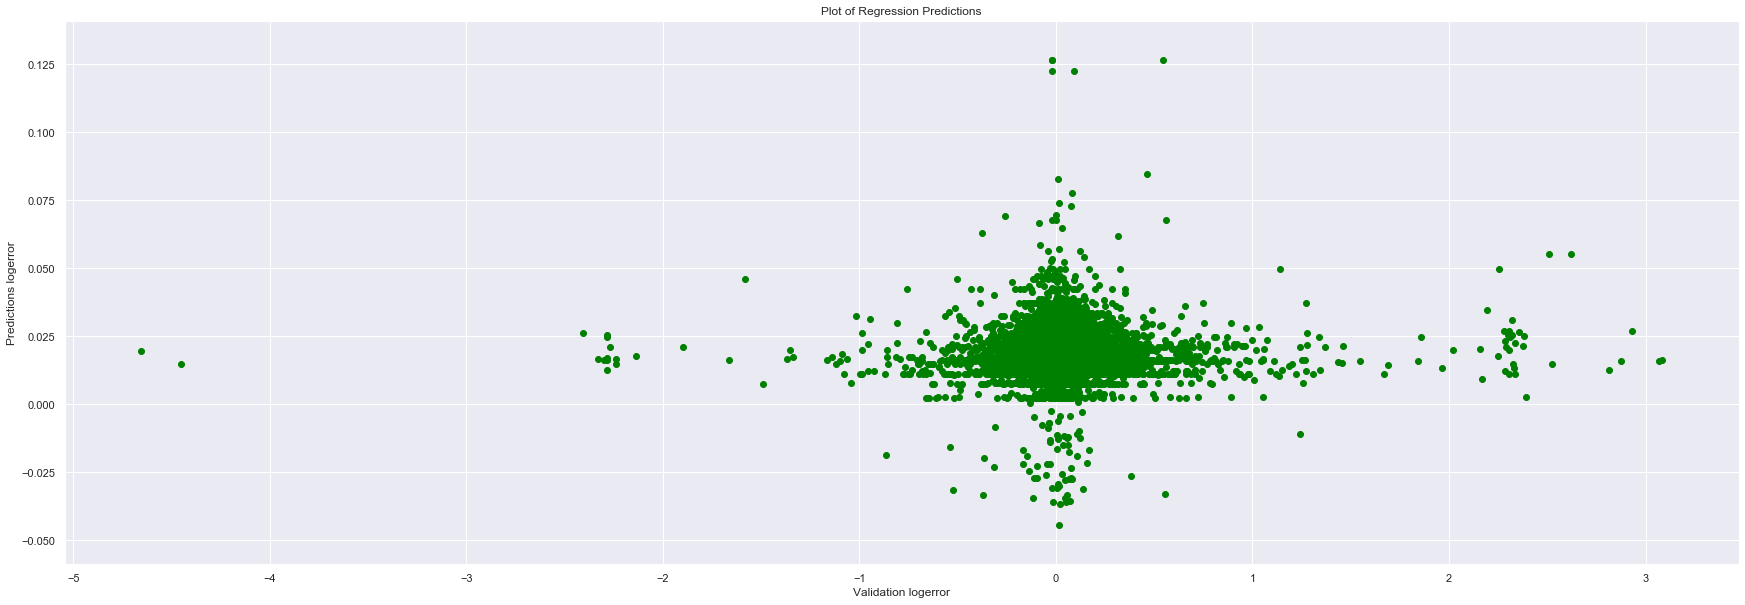

In [94]:
plt.scatter(val_y['logerror'], predictions, color='green')
plt.title("Plot of Regression Predictions")
plt.xlabel('Validation logerror')
plt.ylabel('Predictions logerror')
plt.show()


### Question 11  - Correlation Matrix
Note: I previously used this matrix to inform my choice in predictors

numberofstories, lotsizesquarefeet, and bathroomcnt are all not too correlated with the logerror value and probably should have been left out of the model. There was a lot of correlation between obvious values like numberofstories and finishedsquarefeet6. I therefore could have used a different column to improve the accuracy.

In [100]:
_df[['bathroomcnt', 'finishedsquarefeet6', 'bedroomcnt', 'lotsizesquarefeet', 'numberofstories', 'logerror']].corr()

,bathroomcnt,finishedsquarefeet6,bedroomcnt,lotsizesquarefeet,numberofstories,logerror
bathroomcnt,1.0000,-0.2876,0.6355,0.0025,0.3314,0.0258
finishedsquarefeet6,-0.2876,1.0000,-0.3395,0.1765,0.5158,0.0729
bedroomcnt,0.6355,-0.3395,1.0000,-0.1106,0.1629,0.0316
lotsizesquarefeet,0.0025,0.1765,-0.1106,1.0000,0.0061,0.0110
numberofstories,0.3314,0.5158,0.1629,0.0061,1.0000,0.0082
logerror,0.0258,0.0729,0.0316,0.0110,0.0082,1.0000


### Question 13 - Improving the Model

- I could definitely use the feature selection to limit the correlated variables that express the same informaiton.
- I would defintiely consider some transformations to make the data more normal and have equal variance.
- I might try to add in some of the categorical variables to the model as well. I limited my predictor variables to quantitative values only.